### 人脸常见情绪：

上世纪70年代，心理学家 Paul Eckman 确定了6种基本情绪。  

他认为这些情绪在所有人类文化中普遍存在，其中包括：幸福、悲伤、厌恶、恐惧、惊讶、和愤怒。  

后来他又扩充了基本情绪的清单，包括骄傲、羞耻、尴尬、和兴奋等。  

https://zhuanlan.zhihu.com/p/574732604   

In [ ]:
## import the thrid party library!

In [1]:
import os
import glob
import cv2 
import math
import shutil
import config 
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import dlib
import tensorflow as tf
from scipy.linalg import svd
from sklearn.model_selection import train_test_split

In [2]:
## explain
# %!m(MISSING)atplotlib inline is a magic command in Jupyter Notebook and JupyterLab that allows you to display matplotlib plots directly in the output cell of the notebook.

# When this command is executed, it sets the backend of matplotlib to the inline backend, which renders the plots as static images embedded in the notebook. This is useful for creating data visualizations in the same notebook as your data analysis code.

# Note that this command must be executed before any plotting commands in your notebook. If you want to change the backend or customize the behavior of matplotlib, you can use other magic commands or call the relevant functions directly

%matplotlib inline

In [7]:
path = glob.glob("E:/face_dectection/emotion/happy/*.jpg")
path_r="E:/face_dectection/emotion/happy"
face_write_path = 'E:\\face_dectection\\Detected\\'

In [8]:
filenames=[]
for f in os.listdir(path_r):
    if"jpg" in f:
        print(f)
        filenames.append(f)

recgonize_happy1.jpg
recgonize_happy10.jpg
recgonize_happy100.jpg
recgonize_happy101.jpg
recgonize_happy102.jpg
recgonize_happy103.jpg
recgonize_happy104.jpg
recgonize_happy105.jpg
recgonize_happy106.jpg
recgonize_happy107.jpg
recgonize_happy108.jpg
recgonize_happy109.jpg
recgonize_happy11.jpg
recgonize_happy110.jpg
recgonize_happy111.jpg
recgonize_happy112.jpg
recgonize_happy113.jpg
recgonize_happy114.jpg
recgonize_happy115.jpg
recgonize_happy116.jpg
recgonize_happy117.jpg
recgonize_happy118.jpg
recgonize_happy119.jpg
recgonize_happy12.jpg
recgonize_happy120.jpg
recgonize_happy121.jpg
recgonize_happy122.jpg
recgonize_happy123.jpg
recgonize_happy124.jpg
recgonize_happy125.jpg
recgonize_happy126.jpg
recgonize_happy127.jpg
recgonize_happy128.jpg
recgonize_happy129.jpg
recgonize_happy13.jpg
recgonize_happy130.jpg
recgonize_happy131.jpg
recgonize_happy132.jpg
recgonize_happy133.jpg
recgonize_happy134.jpg
recgonize_happy135.jpg
recgonize_happy136.jpg
recgonize_happy137.jpg
recgonize_happy13

In [9]:
#picture numbers 
len(filenames)

415

**dlib简介**

Dlib是一个用C ++编写的工具库，其中包含一些机器学习方面的算法和软件，用来解决复杂现实世界问题，
目前该软件库在工业上和学术界都得到了广泛的使用（该库为开源库）<br>
dlib和opencv都有可以进行人脸检测的模块。
OpenCV的Haar Cascade运行速度快，但是容易出现将非人脸部分检测为人脸的情况，
DNN人脸检测在各方面的表现都比较优秀，但是似乎不能使用NVIDIA GPU。
dlib中实现了SURF、HOG和FHOG的特征提取算法。更够准确检测大部分人脸，对存在遮挡的人脸也能进行正确检测.
官网文档地址：http://dlib.net/

参考
https://blog.csdn.net/weixin_45909259/article/details/119746145
https://blog.csdn.net/qq_43279579/article/details/117637044

In [ ]:
help(dlib.get_frontal_face_detector)

### 进行人脸区域的检测

In [11]:
#setting 
temp_image=[]
width =48
height =48
cnt=0

#use dlib dectect the image with variuos emotion
hogFaceDetector = dlib.get_frontal_face_detector()
for img in path:
    im = cv2.imread(img)
    #这个函数需要格外了解一下
    try:
        faceRects = hogFaceDetector(im, 0)
    except:
        print(img+"is not done!")
        continue
    for faceRect in faceRects:
        x = faceRect.left()
        y = faceRect.top()
        x2 = faceRect.right()
        y2 = faceRect.bottom()
    #get the region that decteced!
    try:
        c_img = im[y:y2,x:x2]
        gray = cv2.cvtColor(c_img,cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray,(height,width))
        temp_image.append(gray)
    except:
        continue
    filename=filenames[cnt]
    #write the region that decteced to the destion path
    cv2.imwrite(os.path.join(face_write_path ,filename),gray)
    cnt=cnt+1
    print(os.path.join(face_write_path ,filename))
print("all dected image is done! plese check in your save path")

E:\face_dectection\Detected\recgonize_happy1.jpg
E:\face_dectection\Detected\recgonize_happy10.jpg
E:\face_dectection\Detected\recgonize_happy100.jpg
E:\face_dectection\Detected\recgonize_happy101.jpg
E:\face_dectection\Detected\recgonize_happy102.jpg
E:\face_dectection\Detected\recgonize_happy103.jpg
E:/face_dectection/emotion/happy\recgonize_happy105.jpgis not done!
E:\face_dectection\Detected\recgonize_happy104.jpg
E:\face_dectection\Detected\recgonize_happy105.jpg
E:\face_dectection\Detected\recgonize_happy106.jpg
E:/face_dectection/emotion/happy\recgonize_happy109.jpgis not done!
E:\face_dectection\Detected\recgonize_happy107.jpg
E:\face_dectection\Detected\recgonize_happy108.jpg
E:\face_dectection\Detected\recgonize_happy109.jpg
E:\face_dectection\Detected\recgonize_happy11.jpg
E:\face_dectection\Detected\recgonize_happy110.jpg
E:\face_dectection\Detected\recgonize_happy111.jpg
E:\face_dectection\Detected\recgonize_happy112.jpg
E:\face_dectection\Detected\recgonize_happy113.jpg
E

E:\face_dectection\Detected\recgonize_happy221.jpg
E:\face_dectection\Detected\recgonize_happy222.jpg
E:\face_dectection\Detected\recgonize_happy223.jpg
E:\face_dectection\Detected\recgonize_happy224.jpg
E:/face_dectection/emotion/happy\recgonize_happy258.jpgis not done!
E:\face_dectection\Detected\recgonize_happy225.jpg
E:\face_dectection\Detected\recgonize_happy226.jpg
E:\face_dectection\Detected\recgonize_happy227.jpg
E:\face_dectection\Detected\recgonize_happy228.jpg
E:\face_dectection\Detected\recgonize_happy229.jpg
E:/face_dectection/emotion/happy\recgonize_happy263.jpgis not done!
E:\face_dectection\Detected\recgonize_happy23.jpg
E:\face_dectection\Detected\recgonize_happy230.jpg
E:/face_dectection/emotion/happy\recgonize_happy266.jpgis not done!
E:\face_dectection\Detected\recgonize_happy231.jpg
E:\face_dectection\Detected\recgonize_happy232.jpg
E:\face_dectection\Detected\recgonize_happy233.jpg
E:\face_dectection\Detected\recgonize_happy234.jpg
E:/face_dectection/emotion/happy

E:\face_dectection\Detected\recgonize_happy340.jpg
E:\face_dectection\Detected\recgonize_happy341.jpg
E:\face_dectection\Detected\recgonize_happy342.jpg
E:\face_dectection\Detected\recgonize_happy343.jpg
E:\face_dectection\Detected\recgonize_happy344.jpg
E:\face_dectection\Detected\recgonize_happy345.jpg
E:\face_dectection\Detected\recgonize_happy346.jpg
E:\face_dectection\Detected\recgonize_happy347.jpg
E:\face_dectection\Detected\recgonize_happy348.jpg
E:\face_dectection\Detected\recgonize_happy349.jpg
E:\face_dectection\Detected\recgonize_happy35.jpg
E:/face_dectection/emotion/happy\recgonize_happy412.jpgis not done!
E:\face_dectection\Detected\recgonize_happy350.jpg
E:\face_dectection\Detected\recgonize_happy351.jpg
E:\face_dectection\Detected\recgonize_happy352.jpg
E:\face_dectection\Detected\recgonize_happy353.jpg
E:\face_dectection\Detected\recgonize_happy354.jpg
E:\face_dectection\Detected\recgonize_happy355.jpg
E:\face_dectection\Detected\recgonize_happy356.jpg
E:\face_dectect

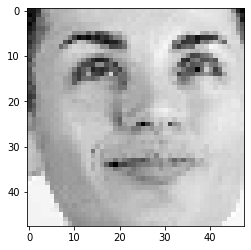

In [12]:
#浅浅的展示一下效果
plt.imshow(temp_image[3],cmap = "gray")
#len(X)

### 下面尝试进行人脸识别

In [13]:
shape_predictor_path = 'D:/face_dectection/shape_predictor_68_face_landmarks.dat' # 人脸检测器
recognition_model_path = 'D:/face_dectection/dlib_face_recognition_resnet_model_v1.dat'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor_path)                              # 人脸68点提取器
recognition_model = dlib.face_recognition_model_v1(recognition_model_path)          # 基于resnet的128维特征向量提取器

In [ ]:
import cv2 as cv
import os
import numpy as np
import csv
import config
from tqdm import tqdm
import shutil

def write2csv(data, mode):                      # 更新库内所有数据
    with open(config.csv_base_path, mode, newline='') as wf:
        csv_writer = csv.writer(wf)
        csv_writer.writerow(data)

def get_features_from_csv():
    features_in_csv = []
    with open(config.csv_base_path, 'r') as rf:
        csv_reader = csv.reader(rf)
        for row in csv_reader:
            for i in range(0, 128):
                row[i] = float(row[i])

            features_in_csv.append(row)
        return features_in_csv

def save_select_in_csv(data):                   # 库内数据选择更新
    features_in_csv = get_features_from_csv()

    with open(config.csv_base_path, 'w', newline='') as wf:
        csv_writer = csv.writer(wf)
        for index, i in enumerate(config.face_needTo_update):
            features_in_csv[i] = data[index]

        csv_writer.writerow(features_in_csv[0])

    with open(config.csv_base_path, 'a+', newline='') as af:
        csv_writer = csv.writer(af)
        for j in range(1, len(features_in_csv)):
            csv_writer.writerow(features_in_csv[j])

    print("csv文件更新完成!!")

def get_128_features(person):                    # person代表第几个人脸数据文件夹
    num = 0
    features = []
    imgs_folder = config.imgs_folder_path[person]
    points_faceImage_path = config.points_faceData_path + imgs_folder

    imgs_path = config.faceData_path + imgs_folder + '/'
    list_imgs = os.listdir(imgs_path)
    imgs_num = len(list_imgs)

    if os.path.exists(config.points_faceData_path + imgs_folder):
        shutil.rmtree(points_faceImage_path)
    os.makedirs(points_faceImage_path)
    print("人脸点图文件夹建立成功!!")

    with tqdm(total=imgs_num) as pbar:
        pbar.set_description(str(imgs_folder))
        for j in range(imgs_num):
            image = cv.imread(os.path.join(imgs_path, list_imgs[j]))

            faces = config.detector(image, 1)           # 经查阅资料，这里的1代表采样次数
            if len(faces) != 0:
                for z, face in enumerate(faces):
                    shape = config.predictor(image, face)       # 获取68点的坐标

                    w, h = (face.right() - face.left()), (face.bottom() - face.top())
                    left, right, top, bottom = face.left() - w // 4, face.right() + w // 4, face.top() - h // 2, face.bottom() + h // 4
                    im = image

                    cv.rectangle(im, (left, top), (right, bottom), (0, 0, 255))
                    cv.imwrite(points_faceImage_path + '/{}.png'.format(j), im)

                    if config.get_points_faceData_flag == True:
                        for p in range(0, 68):
                            cv.circle(image, (shape.part(p).x, shape.part(p).y), 2, (0,0,255))
                        cv.imwrite(points_faceImage_path + '/{}.png'.format(j), image)

                    the_features = list(config.recognition_model.compute_face_descriptor(image, shape)) # 获取128维特征向量
                    features.append(the_features)
                    #print("第{}张图片，第{}张脸,特征向量为:{}".format(j+1, z+1, the_features))
                    num += 1
            pbar.update(1)

    np_f = np.array(features)
    #res = np.mean(np_f, axis=0)
    res = np.median(np_f, axis=0)

    return res

def main():
    #config is system config feature
    if config.import_all_features_flag == True:
        res = get_128_features(person=0)
        write2csv(res, 'w')
        for i in range(1, config.num_of_person_in_lib):
            res = get_128_features(person=i)
            write2csv(res, 'a+')
            #print("人脸特征向量为：{}".format(res))
    else:
        select_res = []
        for i in config.face_needTo_update:
            res = get_128_features(person=i)
            select_res.append(res)
        save_select_in_csv(select_res)

In [ ]:
import numpy as np
import csv
import config
import cv2 as cv
from collect_face_data import face_detect

class face_recognition(face_detect):
    def __init__(self, cam):
        super(face_recognition, self).__init__()
        self.camera = cam
        self.available_max_face_num = 50        # 最大的人脸检测数量(不一定能达到)
        self.collect_face_data = False          # 人脸识别过程不采集数据，固定为False

        self.all_features = []                  # 存储库中所有特征向量
        self.check_features_from_cam = []       # 存储五次检测过程，每次得到的特征向量

        self.person_name = []                   # 存储人名
        self.all_name = []                      # 存储预测到的所有人名

        self.all_face_location = None           # 存储一帧中所有人脸的坐标
        self.middle_point = None                # 存储一张人脸的中心点坐标
        self.last_frame_middle_point = []       # 存储上一帧所有人脸的中心点坐标

        self.all_e_distance = []                # 存储当前人脸与库中所有人脸特征的欧氏距离
        self.last_now_middlePoint_eDistance = [99999 for x in range(self.available_max_face_num)]   # 存储这帧与上一帧每张人脸中心点的欧氏距离

        for i in range(self.available_max_face_num):
            self.all_e_distance.append([])
            self.person_name.append([])
            self.check_features_from_cam.append([])
            self.last_frame_middle_point.append([])

    def get_feature_in_csv(self):                                       # 获得库内所有特征向量
        datas = csv.reader(open(config.csv_base_path, 'r'))
        for row in datas:
            for i in range(128):
                row[i] = float(row[i])

            self.all_features.append(row)

    def get_faceName(self):                                             # 获得库内所有人名
        with open(config.faceName_path, 'r', encoding='utf-8') as f:
            datas = f.readlines()
            for line in datas:
                self.all_name.append(line[:-1])
            print("库中存在的人名有：{}".format(self.all_name))

    def calculate_EuclideanDistance(self, feature1, feature2):          # 计算欧氏距离
        np_feature1 = np.array(feature1)
        np_feature2 = np.array(feature2)

        EuclideanDistance = np.sqrt(np.sum(np.square(np_feature1 - np_feature2)))

        return EuclideanDistance

    def meadian_filter(self, the_list, num_of_data):
        np_list = np.array(the_list)
        feature_max = np.max(np_list, axis=0)
        feature_min = np.min(np_list, axis=0)
        res = (np.sum(np_list, axis=0) - feature_max - feature_min) / (num_of_data-2)

        res.tolist()
        return res

    def middle_filter(self, the_list):
        np_list = np.array(the_list)
        return np.median(np_list, axis=0)

    def init_process(self):
        self.get_feature_in_csv()
        self.get_faceName()

    def track_link(self):           # 这个函数是为了让后续帧的序号与初始帧的序号对应
        for index in range(self.face_num):
            self.last_now_middlePoint_eDistance[index] = self.calculate_EuclideanDistance(self.middle_point,
                                                                              self.last_frame_middle_point[index])
        this_face_index = self.last_now_middlePoint_eDistance.index(min(self.last_now_middlePoint_eDistance))
        self.last_frame_middle_point[this_face_index] = self.middle_point

        return this_face_index

    def recognition_from_cam(self):
        self.init_process()
        while self.camera.isOpened() and not self.quit_flag:
            val, self.image = self.camera.read()
            if val == False: continue

            #self.image = cv.imread('./data/test/test_xi.jpg')
            #self.image = cv.imread('./data/test/multi.png')

            key = cv.waitKey(1)

            res = self.face_detecting()         # 0.038s

            if res is not None:
                face, self.all_face_location = res

                for i in range(self.face_num):
                    [left, right, top, bottom] = self.all_face_location[i]
                    self.middle_point = [(left + right) /2, (top + bottom) / 2]

                    self.face_img = self.image[top:bottom, left:right]

                    cv.rectangle(self.image, (left, top), (right, bottom), (0, 0, 255))

                    shape = config.predictor(self.image, face[i])       # 0.002s

                    if self.face_num_change_flag == True or self.check_times <= 5:
                        if self.face_num_change_flag == True:       # 人脸数量有变化，重新进行五次检测
                            self.check_times = 0
                            self.last_now_middlePoint_eDistance = [99999 for _ in range(self.available_max_face_num)]
                            for z in range(self.available_max_face_num):    self.check_features_from_cam[z] = []

                        if self.check_times < 5:
                            the_features_from_cam = list(config.recognition_model.compute_face_descriptor(self.image, shape))   # 耗时主要在这步 0.32s
                            if self.check_times == 0:           # 初始帧
                                self.check_features_from_cam[i].append(the_features_from_cam)
                                self.last_frame_middle_point[i] = self.middle_point
                            else:
                                this_face_index = self.track_link()         # 后续帧需要与初始帧的人脸序号对应
                                self.check_features_from_cam[this_face_index].append(the_features_from_cam)

                        elif self.check_times == 5:
                            features_after_filter = self.middle_filter(self.check_features_from_cam[i])
                            self.check_features_from_cam[i] = []
                            for person in range(config.num_of_person_in_lib):
                                e_distance = self.calculate_EuclideanDistance(self.all_features[person],
                                                                              features_after_filter)  # 几乎不耗时

                                self.all_e_distance[i].append(e_distance)

                            if min(self.all_e_distance[i]) < config.recognition_threshold:
                                self.person_name[i] = self.all_name[self.all_e_distance[i].index(min(self.all_e_distance[i]))]
                                cv.putText(self.image, self.person_name[i],
                                           (int((left + right) / 2) - 50, bottom + 20),
                                           cv.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255))
                            else:
                                self.person_name[i] = "Unknown"

                            print("预测结果为:{}, 与库中各人脸的欧氏距离为:{}".format(self.person_name[i], self.all_e_distance[i]))

                    else:
                        this_face_index = self.track_link()
                        #print(this_face_index, self.person_name)
                        cv.putText(self.image, self.person_name[this_face_index], (int((left + right) / 2) - 50, bottom + 20),
                                   cv.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255))
                self.check_times += 1

                for j in range(self.available_max_face_num):
                    self.all_e_distance[j] = []

                self.key_scan(key)

            self.get_fps()
            cv.namedWindow('camera', 0)
            cv.imshow('camera', self.image)

        self.camera.release()
        cv.destroyAllWindows()

def main():
    cam = cv.VideoCapture(0)
    process = face_recognition(cam)
    process.recognition_from_cam()

if __name__ == '__main__':
    main()